In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

%matplotlib inline
!pwd

/c/HDD/Courses/gitRepos/MNIST-CNN-TF/MNIST-CNN-TF


In [2]:
mnist = tf.keras.datasets.mnist

wd = !pwd
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

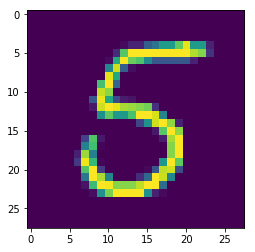

In [3]:
plt.imshow(x_train[768,:,:])

In [4]:
wd = !pwd
print(str(wd[0][2:]))

/HDD/Courses/gitRepos/MNIST-CNN-TF/MNIST-CNN-TF


In [5]:
with tf.device('/gpu:0'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    tensorboard = TensorBoard(log_dir=r"logs\{}".format(time()))

    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard])
    model.evaluate(x_test, y_test)

W0704 09:04:57.145304 30676 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2208 - accuracy: 0.9342
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0968 - accuracy: 0.9705
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0681 - accuracy: 0.9786
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0542 - accuracy: 0.9824
Epoch 5/5
10000/10000 [==============================] - 0s 43us/sample - loss: 0.0626 - accuracy: 0.9792
